# Libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Filter

Реализуем диагональный фильтр, посмотрим пару примеров с ним
- реализуем функцию `filter(img)`, которая обратаывает изображение фильтром 3 на 3 для определения диагональных элементов;
- затем проверим ее работу на данных MNIST для единиц и двоек.

In [2]:
def filter(img):
    matr = 1/3*np.array(
            [[0, 1, 0],
            [0, 1, 0],
            [0, 1, 0]])
        

    ans = np.zeros((img.shape[0]-2, img.shape[1]-2))
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            ans[i-1, j-1] = np.sum(matr*img[i-1:i+2, j-1:j+2])

    return ans


In [13]:
assert filter(np.eye(3))[0, 0] == 1/3

print("OK")

OK


## Данные MNIST

Возьмем 2 изображения -- 1-ое для единицы, второе для двойки и псмотрим на их матрицы яркости -- результата свертки.

In [4]:
X, y = np.load("../2nd Task/Mnist_X.npy"), np.load("../2nd Task/Mnist_y.npy")

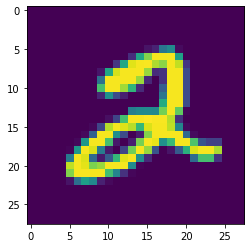

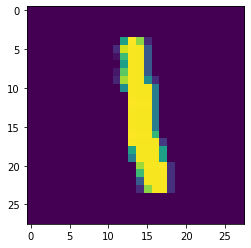

In [5]:
done_one = False
done_two = False
cnt_1 = 0
for i, (x, label) in enumerate(zip(X, y)):
    if label == 1 and not done_one and cnt_1 > 0:
        plt.imshow(x)
        plt.show()
        x_1 = x
        done_one = True
    elif label == 2 and not done_two:
        plt.imshow(x)
        plt.show()
        x_2 = x
        done_two = True
    elif label == 1 and not done_one:
        cnt_1 += 1
    if done_two and done_one:
        break

0.4794227963798093


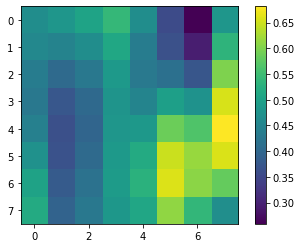

In [6]:
im_0 = x_2/255
for i in range(10):
    im_0 = filter(im_0)
plt.imshow(im_0)
plt.colorbar()
print(im_0.mean())

0.4434007615476543


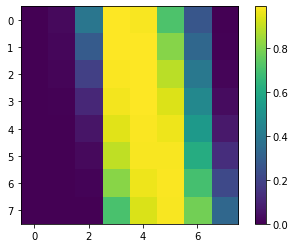

In [7]:
im_1 = x_1/255
for i in range(10):
    im_1 = filter(im_1)
plt.imshow(im_1)
plt.colorbar()
print(im_1.mean())

# Pooling

- Напишем функцию `pool(img)`, применяющую max-pooling для изображения

In [8]:
def pool(img):

    print(img.shape)
    ans = np.zeros((img.shape[0]//2+img.shape[0]%2, img.shape[1]//2+img.shape[1]%2))

    for i in range(0, img.shape[0], 2):
        for j in range(0, img.shape[1], 2):
            ans[i//2][j//2] = np.max(img[i:i+2, j:j+2])

    return ans

(26, 26)
(11, 11)
0.4593076736867586


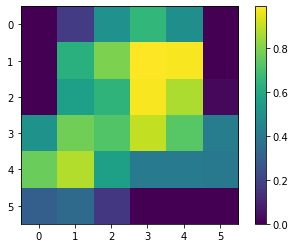

In [9]:
im_2 = x_2/255
for i in range(2):
    im_2 = pool(filter(im_2))
plt.imshow(im_2)
plt.colorbar()
print(im_2.mean())

(26, 26)
(11, 11)
0.26259985475671743


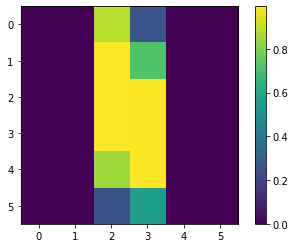

In [10]:
im_1 = x_1/255
for i in range(2):
    im_1 = pool(filter(im_1))
plt.imshow(im_1)
plt.colorbar()
print(im_1.mean())